In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from pathlib import Path


In [28]:
# Load your processed dataset
OUT_DIR = Path('processed')
df = pd.read_csv(OUT_DIR / 'processed_farmer_data.csv')

# Quick look
print(df.head())


         Date  price_avg    temp_c  precip_mm  wind_m_s    rh_pct  Harvest_kg  \
0  2013-06-16   0.176744  0.507131   0.000159  0.296741  0.578778    0.063594   
1  2013-06-17   0.116279  0.471151   0.000043  0.304174  0.586001    0.063594   
2  2013-06-18   0.130233  0.360130   0.000000  0.348199  0.669953    0.468140   
3  2013-06-19   0.148837  0.319935   0.000014  0.296741  0.584425    0.130158   
4  2013-06-20   0.130233  0.345219   0.000014  0.332190  0.586145    0.585106   

   Price_index temp_category precip_category    source  
0     0.144591      Moderate             Low  Original  
1     0.144591      Moderate             Low  Original  
2     0.516175      Moderate             Low  Original  
3     0.500137          Cool             Low  Original  
4     0.393231      Moderate             Low  Original  


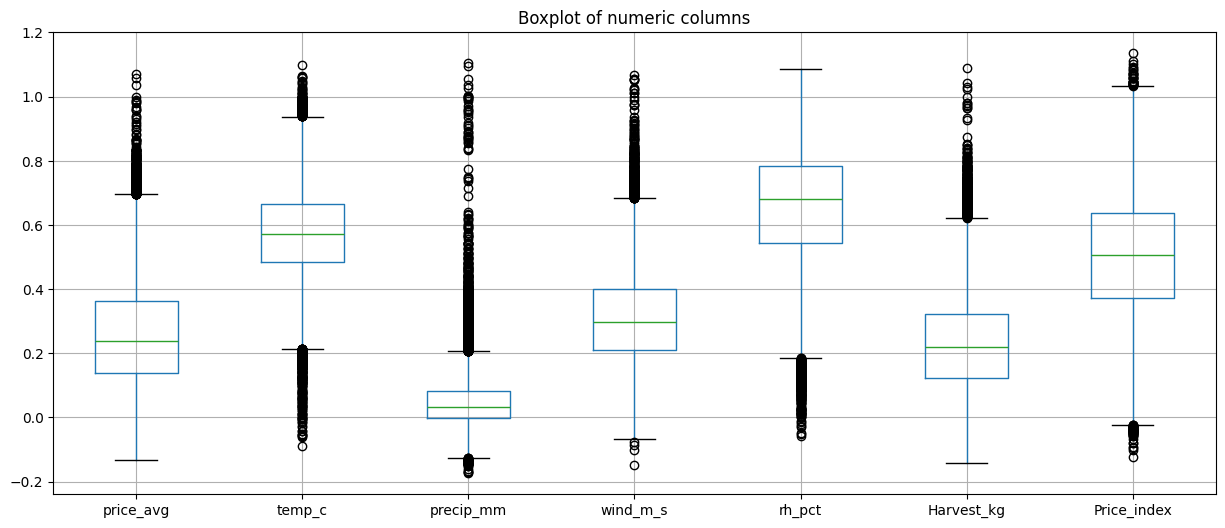

Number of potential outlier rows: 1176


In [29]:
numeric_cols = ['price_avg', 'temp_c', 'precip_mm', 'wind_m_s', 'rh_pct', 'Harvest_kg', 'Price_index']

# Boxplot to visualize outliers
plt.figure(figsize=(15,6))
df[numeric_cols].boxplot()
plt.title("Boxplot of numeric columns")
plt.show()

# Optional: Detect outliers using Z-score
from scipy.stats import zscore
z_scores = np.abs(zscore(df[numeric_cols]))
outliers = (z_scores > 3).any(axis=1)  # rows with any column z>3
print(f"Number of potential outlier rows: {outliers.sum()}")


In [30]:
X = df[['temp_c', 'precip_mm', 'wind_m_s', 'rh_pct', 'Harvest_kg', 'Price_index']]
y = df['price_avg']

# Optional: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)


In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")


RMSE: 0.16
R^2 Score: 0.02
